In [1]:
import os

if "jbook" in os.getcwd():
    os.chdir(os.path.abspath(os.path.join("../..")))
import warnings

warnings.filterwarnings("ignore")

# Univariate Distribution Exploration

## Introduction

### Objective

Our objective for the distribution exploration is to gain a comprehensive understanding of the distribution characteristics and patterns within our dataset. Through the analysis of nominal, interval, and discrete variables, we aim to uncover insights that inform decision-making processes and guide further exploration of the data.

### Scope
This analysis will include nearly 17 million observations, focusing on the following variables:

| #  | Name          | Data Type      | Measurement | Description                                                                                     |
|----|---------------|----------------|-------------|-------------------------------------------------------------------------------------------------|
| 1  | app_name      | string         | nominal     | Name for each app in the App Store.                                                             |
| 2  | category      | category       | nominal     | Name of the category or genre to which each app belongs.                                        |
| 3  | author        | string         | nominal     | 10-character hash sequence representing a unique review author.                                 |
| 4  | rating        | numeric        | interval    | Represents the author's level of satisfaction with the app on a five-point scale from 1 to 5.   |
| 5  | title         | string         | nominal     | String that characterizes or summarizes a review.                                               |
| 6  | review_length | numeric        | discrete    | Number of words in a review.                                                                    |
| 7  | vote_count    | numeric        | discrete    | Number of users that cast a vote on the usefulness or value of a review.                       |
| 8  | vote_sum      | numeric        | discrete    | Total of the value of the votes given by users indicating the value or usefulness of a review. |
| 9  | date          | datetime64[ms] | interval    | The date the review was submitted.                                                              |
| 10 | year          | numeric        | interval    | The year the review was submitted.                                                              |
| 11 | month         | numeric        | interval    | The month the review was submitted.                                                             |
| 12 | day           | numeric        | interval    | The day the review was submitted.                                                               |
| 13 | year_month    | numeric        | interval    | The year and month the review was submitted.                                                    |
| 14 | ymd           | numeric        | interval    | The year month a day the review was submitted.                                                  |

### Approach
Our analysis unfolds over a series of steps: 

1. **App Analysis:** We examine the frequency distribution of app names, uncovering the prevalence and prominence of different applications within our dataset.
2. **Category Analysis:** Next, we shift our focus to app categories, exploring the distribution of various genres to understand user preferences and trends.
3. **Author Analysis:** Continuing our exploration, we analyze the distribution of authors to assess their contributions and influence on the digital landscape.
4. **Review Analysis:** Venturing further into the user experience realm, we conduct a univariate analysis of review-related variables, including review length, vote sum, and vote count, to gauge user engagement and sentiment.
5. **Date Analysis:** Our journey culminates with an examination of date-related variables, unraveling temporal patterns and trends that shape user activity and engagement over time.

Additionally, we have set aside a dedicated section for text analysis following this exploratory analysis, where we will conduct a univariate analysis of the actual review data. This will allow us to explore the textual content in depth and uncover valuable insights beyond the numerical and categorical variables examined in this section.

### Variable Types

The variables of interest can be broadly categorized into three types: nominal, interval, and discrete.
- **Nominal Variables:** Nominal variables represent categories without inherent order or numerical value. Examples in our dataset include `category`, `app_name`, `author`, and `title`. These variables are characterized by their qualitative nature, lacking any inherent numerical meaning.
- **Interval Variables:** Interval variables are continuous variables with equal intervals between adjacent values. Examples of interval variables within our dataset are `rating` or `date`. These variables exhibit a quantitative nature, where the numerical values represent measurable quantities with consistent intervals between them.
- **Discrete Variables:** Discrete variables consist of whole numbers with distinct, separate values. Within our dataset, we have `review_length`, `vote_count`, and `vote_sum`, representing discrete counts or sums rather than continuous measurements. These variables are characterized by their distinct and separate values, often representing counts or frequencies of occurrences.

The statistical analyses and analytical techniques described below are tailored to suit the characteristics of each variable type.

### Nominal Variable Analysis
For nominal variables, the following analytical techniques will be used.

  - **Descriptive Statistics:** Summarizes central tendency and variability (spread) of a dataset. 
  - **Frequency Distribution Table:** Tabulation / graphical representation of the frequency of nominal variable values in the dataset.
  - **Pareto Chart:** Bar plot illustrating frequency counts, with a line graph showing cumulative percentage of values. 
  - **Word Cloud:** A visual representation of words and their frequencies.
  - **Diversity Index:** Quantify richness and diversity of the dataset using two indices: Simpson's Diversity Index, and the Shannon-Wiener Diversity Index.
  - **Lorenz Curve and Gini Coefficient:** A quantitative and visual measure of nominal variable value frequency inequality within the dataset.
  - **Entropy Calculation:** Measure uncertainty or randomness within a dataset.
  - **Variance and Standard Deviation:** Although typically used for numerical data, variance, and standard deviation can be adapted to measure the spread of frequencies in categorical data.

A further brief of the diversity and inequality measures introduced above can be found [here](stats_methods).  

### Interval and Discrete Variable Analyses
Here are the statistical techniques for interval variable analysis:

- **Descriptive Statistics:** Calculating measures such as mean, median, mode, variance, and standard deviation to summarize the central tendency, variability, and shape of the distribution.
- **Histogram:** Visualizing the frequency distribution of interval data using a histogram, which displays the distribution of values along the horizontal axis and the frequency of occurrence on the vertical axis.
- **Box Plot (Box-and-Whisker Plot):** Constructing a box plot to display the distribution of interval data, including the median, quartiles, and outliers, providing insights into the spread and symmetry of the data.
- **Frequency Polygon:** Plotting a frequency polygon, which connects the midpoints of the intervals in a histogram with line segments, providing a smooth representation of the frequency distribution.
- **Cumulative Frequency Distribution:** Creating a cumulative frequency distribution table and plotting a cumulative frequency curve to visualize the proportion of observations below certain values, facilitating comparisons across different intervals.
- **Normal Probability Plot:** Constructing a normal probability plot to assess whether the data follow a normal distribution, which is useful for evaluating assumptions in statistical analyses such as regression and hypothesis testing.


Having outlined our objectives, approach, and techniques, we move on to app analysis.

In [ ]:
from explorify.eda.univariate.categorical import (
    UnivariateCategoricalDescriptiveStatisticsAnalyzer,
)
from genailab.container import GenAILabContainer
from genailab.assets.idgen import DatasetIDGen
from genailab.core.flow import Phase, StageDef

In [3]:
container = GenAILabContainer()
container.init_resources()

In [ ]:
asset_id = DatasetIDGen.get_asset_id(
    asset_type="dataset",
    phase=PhaseDef.DATAPREP,
    stage=StageDef.ENRICH_REVIEW,
    name="review",
)
repo = container.persist.repo()
df = repo.get(asset_id=asset_id, distributed=False, nlp=False).content
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78254 entries, 0 to 78253
Data columns (total 49 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   id                                                78254 non-null  object        
 1   app_id                                            78254 non-null  object        
 2   app_name                                          78254 non-null  object        
 3   category_id                                       78254 non-null  object        
 4   author                                            78254 non-null  object        
 5   rating                                            78254 non-null  int16         
 6   content                                           78254 non-null  object        
 7   vote_sum                                          78254 non-null  int64         
 8   vote_count                

In [ ]:
analyer = UnivariateCategoricalDescriptiveStatisticsAnalyzer(df=df)

## App Analysis
Here, we examine the distribution and characteristics of the `app_name` variable. 

### Descriptive Statistics
The descriptive statistics include the total count, unique `app_name` count, the most frequent `app_name` value and its count.

In [ ]:
stats = analyzer.describe(x=["app_name"])
stats.categorical

,app_name
count,15138
unique,3501
top,MyFitnessPal: Calorie Counter
freq,313


### Frequency Distribution Table
The frequency distribution table outlines for the top 20 apps, their counts, cumulative counts, proportions, and cumulative proportions. 


In [6]:
frequency = xplr.top_n_frequency_analysis(x="app_name", n=20)
frequency

,app_name,Count,Cumulative Count,Proportion,Cumulative Proportion
0,MyFitnessPal: Calorie Counter,313,313,0.02,0.02
1,Messenger,264,577,0.02,0.04
2,Life360: Find Friends & Family,186,763,0.01,0.05
3,"Tumblr – Fandom, Art, Chaos",181,944,0.01,0.06
4,Google Classroom,177,"1,121",0.01,0.07
5,BetterSleep: Relax and Sleep,148,"1,269",0.01,0.08
6,Wattpad - Read & Write Stories,124,"1,393",0.01,0.09
7,Kik Messaging & Chat App,122,"1,515",0.01,0.10
8,Tinder - Dating. Meet Friends,122,"1,637",0.01,0.11
9,Map My Run by Under Armour,119,"1,756",0.01,0.12


#TODO

### Bar Plot
Here, we visually depict the top 20 apps by count.

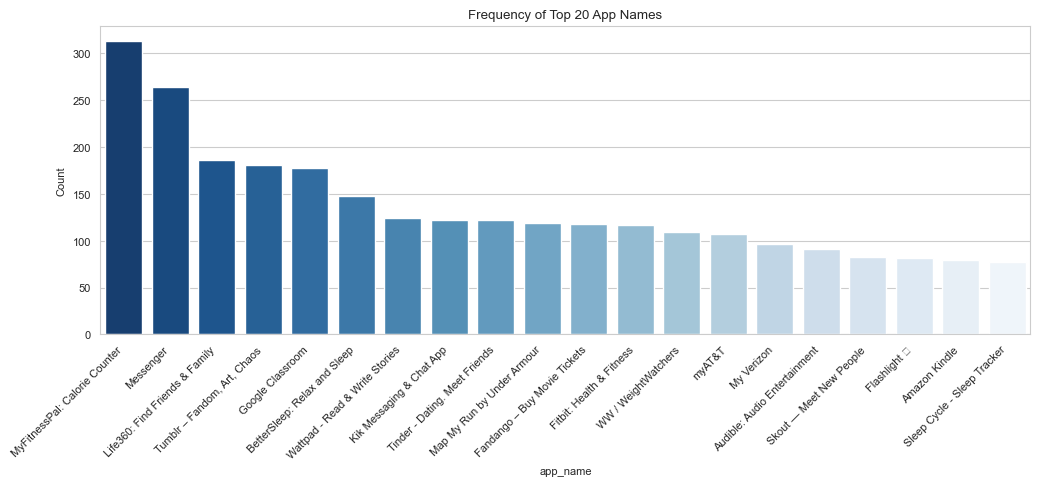

In [ ]:
ax = xplr.plot.barplot(
    data=frequency.data[["app_name", "Count"]].iloc[0:20, :],
    x="app_name",
    y="Count",
    title="Frequency of Top 20 App Names",
    rotate_ticks=("x", 45),
)